In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import distplot
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('LaLiga_players_stats_2017.csv')
df=df[['Team','Name','Position', 'Games played', 'Goals scored', 'Passes','Interceptions', 'Recoveries']]

In [3]:
df.head()

,Team,Name,Position,Games played,Goals scored,Passes,Interceptions,Recoveries
0,Athletic Club,Hodei Oleaga,Goalkeeper,0,0,0.0,0,0
1,Athletic Club,A. Remiro,Goalkeeper,0,0,0.0,0,0
2,Athletic Club,Herrerín,Goalkeeper,31,0,887.0,0,228
3,Athletic Club,Unai Simón,Goalkeeper,7,0,155.0,1,54
4,Athletic Club,Núñez,Defender,12,0,536.0,28,50


In [4]:
df.shape

(556, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           556 non-null    object 
 1   Name           556 non-null    object 
 2   Position       556 non-null    object 
 3   Games played   556 non-null    int64  
 4   Goals scored   556 non-null    int64  
 5   Passes         556 non-null    float64
 6   Interceptions  556 non-null    int64  
 7   Recoveries     556 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 34.9+ KB


In [8]:
df.describe()

,Games played,Goals scored,Passes,Interceptions,Recoveries
count,556.000000,556.000000,556.000000,556.000000,556.000000
mean,18.602518,1.696043,374.933928,14.643885,80.672662
std,12.462351,3.503828,429.315303,16.149052,73.931651
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,1.665500,1.000000,18.000000
50%,20.000000,0.000000,221.000000,8.000000,67.000000
75%,31.000000,2.000000,686.000000,24.000000,126.250000
max,38.000000,36.000000,2535.000000,74.000000,366.000000


In [9]:
df.Team.unique()

array(['Athletic Club', 'Atlético de Madrid', 'CD Leganés', 'D. Alavés',
       'FC Barcelona', 'Getafe CF', 'Girona FC', 'Levante UD',
       'R. Valladolid CF', 'Rayo Vallecano', 'RC Celta', 'RCD Espanyol',
       'Real Betis', 'Real Madrid', 'Real Sociedad', 'SD Eibar',
       'SD Huesca', 'Sevilla FC', 'Valencia CF', 'Villarreal CF'],
      dtype=object)

## Detecting outliers

<AxesSubplot:xlabel='Interceptions', ylabel='Position'>

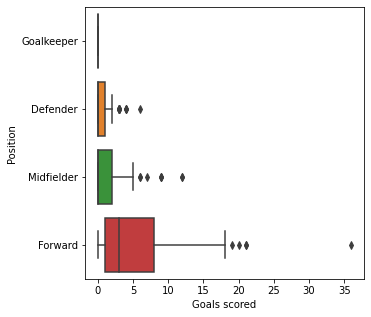

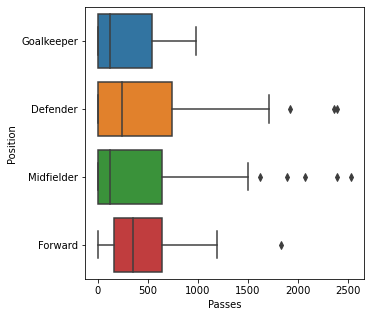

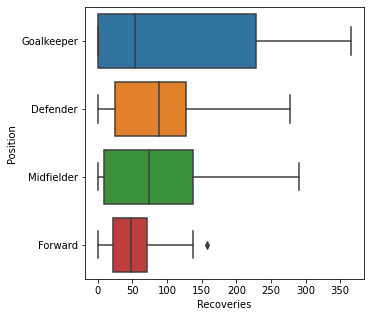

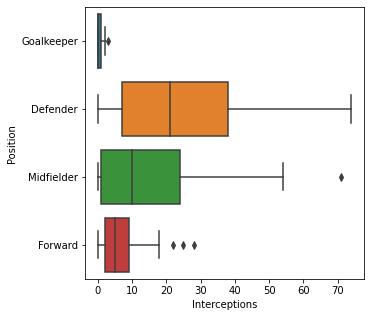

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Goals scored', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Passes', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Recoveries', y='Position')
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Interceptions', y='Position')

## Scatter Plot

<AxesSubplot:xlabel='Interceptions', ylabel='Passes'>

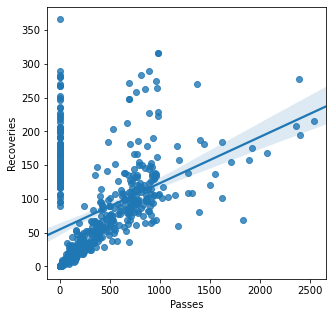

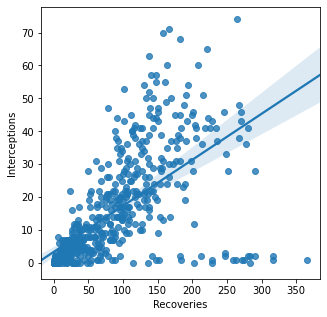

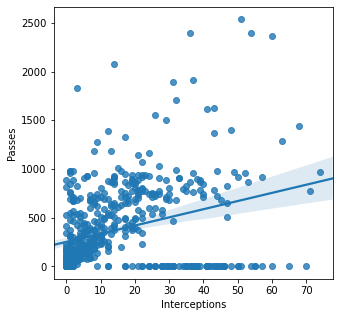

In [66]:
plt.figure(figsize=(5,5))
sns.regplot(x=df['Passes'], y=df['Recoveries'])
plt.figure(figsize=(5,5))
sns.regplot(x=df['Recoveries'], y=df['Interceptions'])
plt.figure(figsize=(5,5))
sns.regplot(x=df['Interceptions'], y=df['Passes'])

## Histogram

<AxesSubplot:xlabel='Interceptions'>

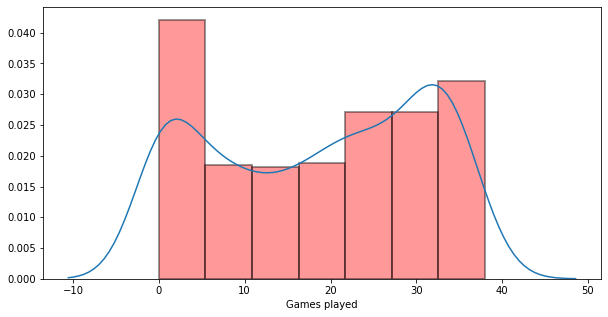

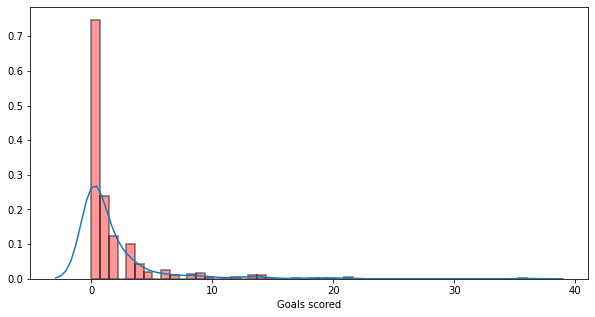

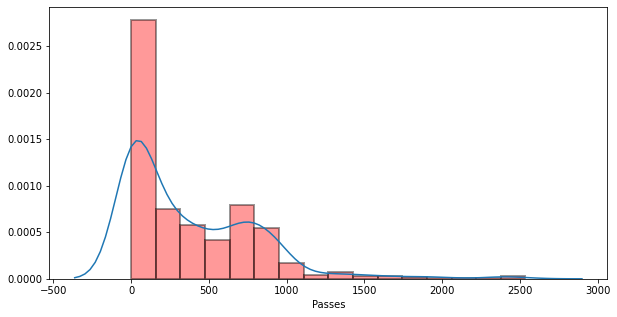

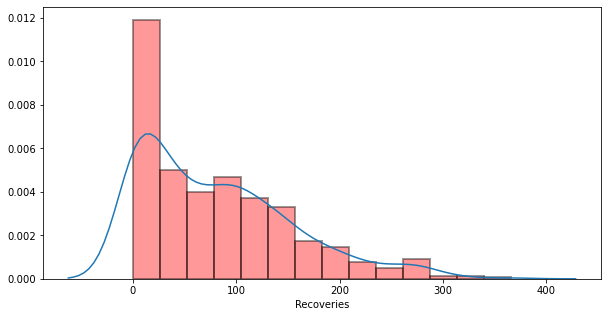

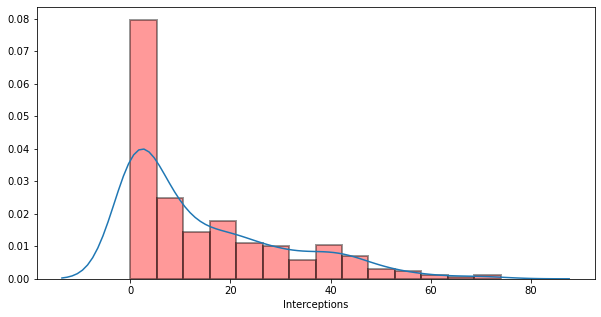

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df['Games played'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(10,5))
sns.distplot(df['Goals scored'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(10,5))
sns.distplot(df['Passes'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(10,5))
sns.distplot(df['Recoveries'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)
plt.figure(figsize=(10,5))
sns.distplot(df['Interceptions'], hist_kws=dict(color='r', edgecolor="k", linewidth=2), kde=True, rug=False)

## Linear Regression

In [324]:
filtered_data = df[(df['Goals scored'] <= 3) & (df['Passes'] <= 400) & (df['Recoveries'] <= 150) & (df['Interceptions'] <= 30)]

In [325]:
datax = filtered_data[['Passes']]
x_train = np.array(datax)
y_train = filtered_data['Interceptions'].values
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.02224136]
Independent term: 
 1.1237186093329736
Mean squared error: 23.86
Variance score: 0.24


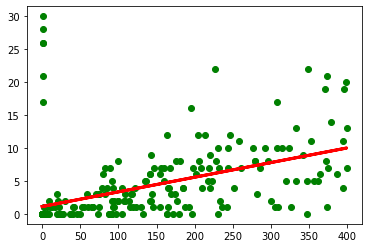

In [326]:
plt.scatter(x_train, y_train,  color='green')
plt.plot(x_train, y_pred, color='red', linewidth=3)